## Байесовская линейная регрессия с библиотекой PYMC3 

В этой практике рассмотрим PYMC3 для байесовской линейной регрессии с оценкой апостериорных распределений вероятностей. 

In [11]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

Давайте создадим некоторые переменные для нашей регрессии. Наши истинные значения:
* $\alpha = 1$
* $\sigma = 1$
* $\beta = 2.5$

Наша итоговая переменная будет расчитана по:
$$ Y = \alpha + \beta_1 X + N(0,\sigma).$$

In [8]:
# фиксируем сид
np.random.seed(42)

# Задаем значения параметров
alpha, sigma = 1, 1
beta = [2.5]

# Размер датасета
size = 1000

# Генерируем вектора признаков
X = np.random.randn(size)

# Считаем
Y = alpha + beta * X + np.random.randn(size)*sigma

отрисовка

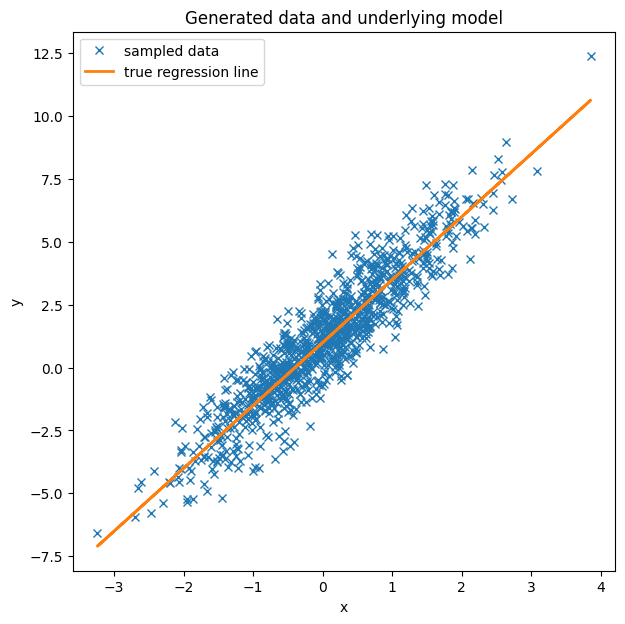

In [9]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(X, Y, "x", label="sampled data")
ax.plot(X, alpha + beta * X, label="true regression line", lw=2.0)
plt.legend(loc=0);

Теперь построим модель.

Априорные распределения:
* $\alpha \sim \mathcal{N}(\mu=0,\sigma=10)$
* $\beta[i] \sim \mathcal{N}(\mu=0,\sigma=10)$, where $i=1$
* $\sigma \sim \textrm{half-normal}(\sigma=1)$

Определим ожидаемое значение:
\begin{equation}
  \text{Y} = \alpha + \beta*X
\end{equation}

Байесовцы придерживаются вероятностного взгляда на мир и выражают эту модель в терминах вероятностных распределений. Нашу приведенную выше линейную регрессию можно переписать, чтобы получить:

\begin{equation}
  \text{Y}\sim \mathcal{N}(\mu=\mu,\sigma=\sigma).
\end{equation}

In [6]:
basic_model = pm.Model()

with basic_model:

    # Приоры для неизвестных параметров модели 
    alpha = pm.Normal('alpha', mu=0, sigma=100) #intercept
    beta = pm.Normal('beta', mu=0, sigma=100) #slope
    sigma = pm.HalfNormal('sigma', sigma=100)

    # Ожидаемое значение переменной
    mu = alpha + beta * X

    # Вероятность (выборочное распределение) наблюдений / Likelihood (sampling distribution) of observations
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=Y)

    # Получаем 5000 объектов из апостериорного распределения
    linear_trace = pm.sample(5000)

/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 9 seconds.


In [7]:
basic_model

/var/folders/df/dz8wtw0j7791hg98mrx_thxc0000gn/T/ipykernel_44879/2162765234.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(linear_trace, figsize = (12, 12))
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

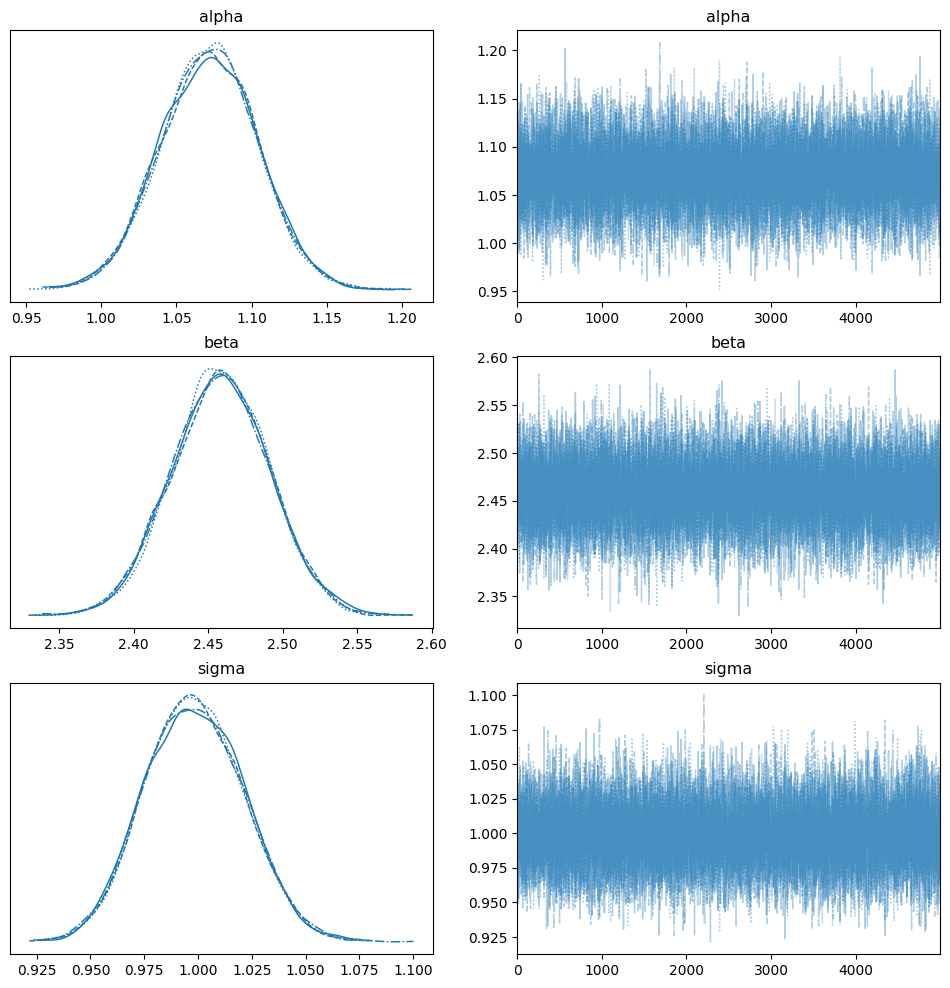

In [8]:
pm.traceplot(linear_trace, figsize = (12, 12))

traceplot - это стандартный хороший способ просмотра апостериорных распределений вероятностей

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


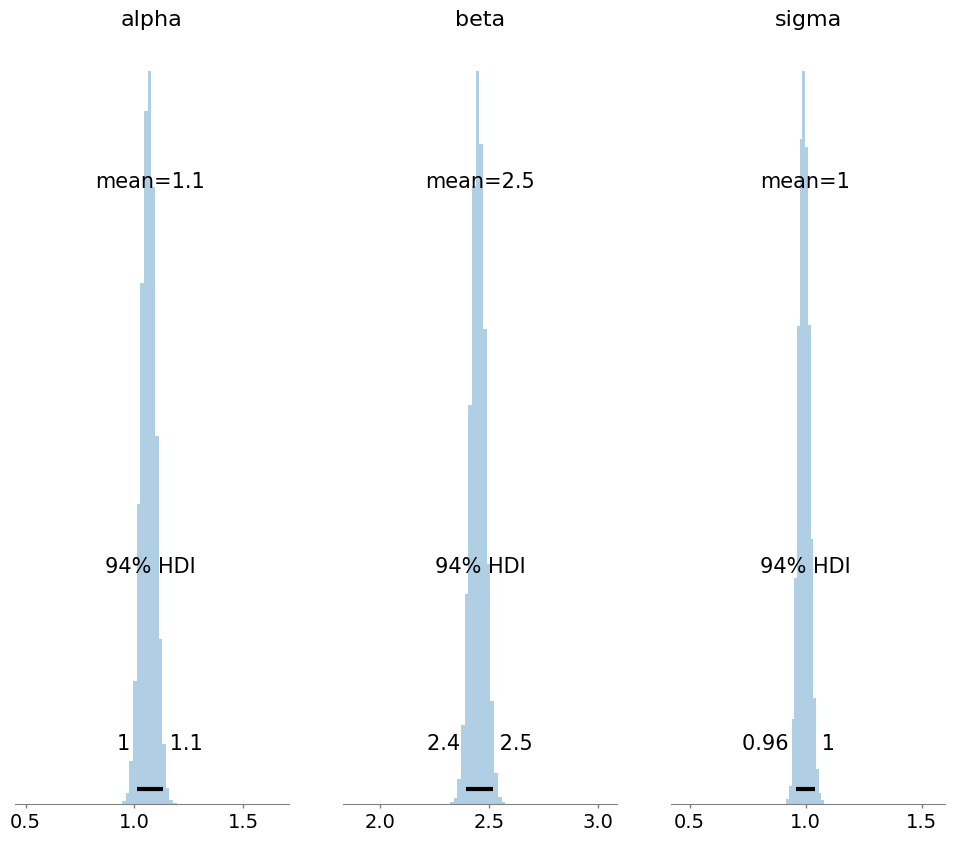

In [9]:
pm.plot_posterior(linear_trace, figsize = (12, 10), kind="hist");

Также есть встроенная функция сводки.

In [14]:
pm.summary(linear_trace).round(2)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.07,0.03,1.01,1.13,0.0,0.0,25709.0,14502.0,1.0
beta,2.46,0.03,2.40,2.52,0.0,0.0,26139.0,14537.0,1.0
sigma,1.00,0.02,0.96,1.04,0.0,0.0,25701.0,14994.0,1.0


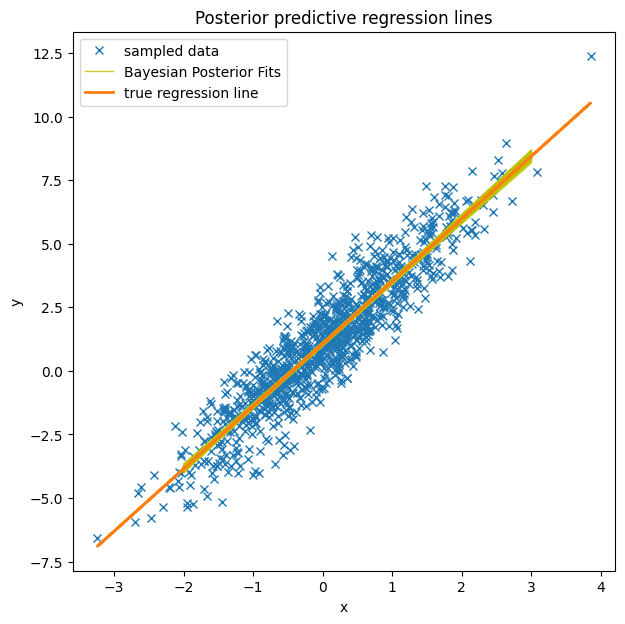

In [17]:
plt.figure(figsize=(7, 7))
plt.plot(X, Y, "x", label="sampled data")
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(-2, 3, 50), linewidth = 1, 
                                 color = 'y', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['alpha'] + sample['beta'] * x);

plt.plot(X, alpha + beta * X, label="true regression line", lw=2.0)
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y");

In [16]:
alpha = linear_trace['alpha'].mean() 
beta = linear_trace['beta'].mean()

---

#### Выполнение заданий

Основываясь на скринкасте, реализуйте байесовскую логистическую регрессию и ответьте на вопросы.
1. Возьмите данные из скринкаста, заменив генерацию переменной У на Y = [1 if x > 1 else 0 for x in alpha + beta * X +
np.random.randn(size) *sigma].

2. В модели вместо $ \mu $ и likelihood используйте формулу для логистической регрессии с сигмоидой и распределение Бернулли.

    Ожидаемое значение переменной
    p = pm.math.sigmoid(alpha + beta * X + sigma)

    # Вероятность (выборочное распределение) наблюдений / Likelihood (sampling distribution) of observations
    likelihood = pm.Bernoulli('likelihood', p, observed=Y)

3. При выводе графика в pm.plot_posterior_predictive_glm в качестве параметра lm передайте функцию с сигмоидой lambda x, sample: sigmoid(sample['alpha'] + sample['beta'] * x).

In [12]:
# фиксируем сид
np.random.seed(42)

# Задаем значения параметров
alpha, sigma = 1, 1
beta = [2.5]

# Размер датасета
size = 1000

# Генерируем вектора признаков
X = np.random.randn(size)

# Считаем
Y = [1 if x > 1 else 0 for x in alpha + beta * X + np.random.randn(size) * sigma]

In [13]:
with pm.Model() as basic_model:

    # Приоры для неизвестных параметров модели
    alpha = pm.Normal("alpha", mu=0, sigma=100)  # intercept
    beta = pm.Normal("beta", mu=0, sigma=100)  # slope
    sigma = pm.HalfNormal("sigma", sigma=100)

    # Ожидаемое значение переменной
    p = pm.math.sigmoid(alpha + beta * X + sigma)

    # Вероятность (выборочное распределение) наблюдений / Likelihood (sampling distribution) of observations
    likelihood = pm.Bernoulli('likelihood', p=p, observed=Y)

    # Получаем 5000 объектов из апостериорного распределения
    linear_trace = pm.sample(5000)

/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 18 seconds.
There were 245 divergences after tuning. Increase `target_accept` or reparameterize.
There were 294 divergences after tuning. Increase 

In [25]:
pm.summary(linear_trace).round(2)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-1.69,1.19,-3.83,0.12,0.30,0.22,18.0,33.0,1.15
beta,4.76,0.31,4.22,5.36,0.02,0.01,439.0,1759.0,1.01
sigma,1.72,1.18,0.00,3.78,0.30,0.22,18.0,31.0,1.16


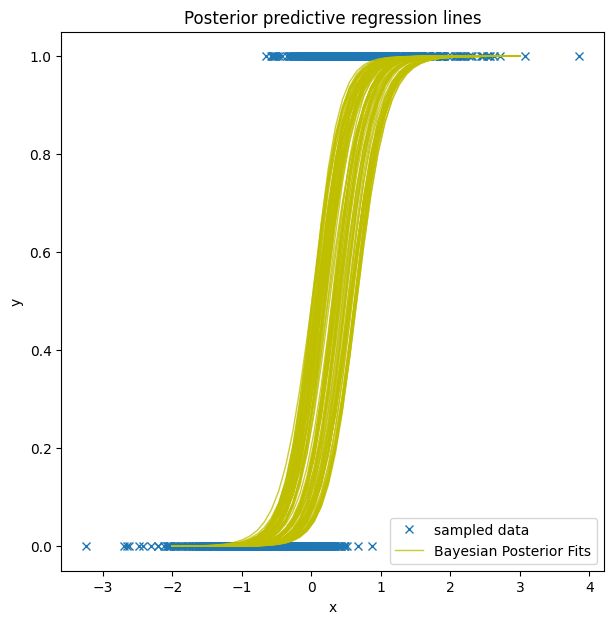

In [24]:
def my_sigma(x):
    return (1/(1+np.exp(-x)))

plt.figure(figsize=(7, 7))
plt.plot(X, Y, "x", label="sampled data")
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(-2, 3, 50), linewidth = 1, 
                                 color = 'y', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: my_sigma(sample['alpha'] + sample['beta'] * x))

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y");

In [29]:
# Задание 4.1
# В какой интервал входит рассчитанное среднее значение alpha  апостериорного распределения?
pm.summary(linear_trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kirillkuznecov/Library/Python/3.9/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-1.689,1.187,-3.826,0.117,0.299,0.216,18.0,33.0,1.15
beta,4.762,0.308,4.217,5.359,0.015,0.011,439.0,1759.0,1.01
sigma,1.721,1.185,0.000,3.777,0.299,0.216,18.0,31.0,1.16
